# Projet 1

In [1]:
import re

import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
book =  open("LOTR_ReturnOfTheKing.txt").read()

book_chapters = re.split(r"_Chapter \w+_",book)[1:]



In [3]:
Characters = [["aragorn","strider","the heir of isildur","king of gondor"], 
              ["arwen", "queen of gondor","evenstar"],
              ["bill ferny"], ["bilbo"],["boromir"], 
              ["beregond"],["bergil"],["butterbur","barliman"],
              ["celeborn", "lord of lothlórien"],
              ["denethor","steward of gondor"],
              ["elanor"],["elendil"],
              ["elladan"],
              ["elrond"],
              ["éomer"],["erestor"],
              ["éowyn","lady of rohan"],
              ["elrohir"],
              ["finduilas"],
              ['fredegar bolger',"fatty","fredegar"], 
              ["frodo","underhill"],
              ["gollum", "sméagol"],
              ["gwaihir"],
              ["faramir"],
              ["galadriel"],
              ["gandalf","mithrandir", "white rider","grey fool"],
              ["gimli"],
              ["glorfindel"],
              ["gothmog", "the lieutenant of morgul"],
              ["gríma","wormtongue"],
              ["imrahil","prince imrahil"],
              ["isildur"],
              ["king of the dead", "king of the mountains"],
              ["legolas"],
              ["lord of the nazgul","ringwraiths","black rider", "king of angmar"],
              ["lotho"],
              ["merry","meriadoc","brandybuck"],
              ["pippin","peregrin","tooks"],
              ["robin", "smallburrow"],
              ["rose cotton", "rosie"],
              ["sam","samwise","gamgee"],
              ["saruman"],
              ["sauron","lord of mordor","lord of the dark tower"],
              ["shadowfax"],
              ["shagrat"],
              ["shelob"],
              ["snaga"],
              ["the lieutenant of the tower","the mouth of sauron"],
              ["tom cotton","farmer cotton" ],
              ["théoden","king of the mark","lord of the mark"],
              ["treebeard","fangorn"],
              ["wídfara"]]



FirstName = [el[0] for el in Characters]
print(FirstName)
len(FirstName)

['aragorn', 'arwen', 'bill ferny', 'bilbo', 'boromir', 'beregond', 'bergil', 'butterbur', 'celeborn', 'denethor', 'elanor', 'elendil', 'elladan', 'elrond', 'éomer', 'erestor', 'éowyn', 'elrohir', 'finduilas', 'fredegar bolger', 'frodo', 'gollum', 'gwaihir', 'faramir', 'galadriel', 'gandalf', 'gimli', 'glorfindel', 'gothmog', 'gríma', 'imrahil', 'isildur', 'king of the dead', 'legolas', 'lord of the nazgul', 'lotho', 'merry', 'pippin', 'robin', 'rose cotton', 'sam', 'saruman', 'sauron', 'shadowfax', 'shagrat', 'shelob', 'snaga', 'the lieutenant of the tower', 'tom cotton', 'théoden', 'treebeard', 'wídfara']


52

In [4]:
print("number of characters: "+ str(len(Characters)))

number of characters: 52


In [5]:
cleanedCharacters = [] # Les espaces des personnages avec des noms composés sont rempacés par des tirets-bas "_"

for i in Characters:
    new_sublist=[]
    for j in i:
        remplace = j.replace(" ","_")
        new_sublist.append(remplace)
    cleanedCharacters.append(new_sublist)

# Je réatribue à Character les personnages nettoyer
print(len(Characters))


52


In [6]:
## CLEANING 

cleaned_parag =[]
for ChapterNb, Chapter in enumerate(book_chapters):
    paragraphsEnsemble = Chapter.split('\n\n')
    for parag in paragraphsEnsemble :
        parag_new = re.sub(r"[!?',;.:']", ' ', parag)
        cleaned_parag.append(parag_new.lower())
        
cleaned_final_parag=[] # Je remplace les paragraphes par des paragraphes avec les noms nettoyer.
for parag in cleaned_parag:
    remplace = parag
    for perso in range(len(Characters)):
        for nom in range(len(Characters[perso])):
            remplace = remplace.replace(Characters[perso][nom], cleanedCharacters[perso][nom])
    cleaned_final_parag.append(remplace)

cleaned_parag = cleaned_final_parag
print(len(cleanedCharacters))
Characters = cleanedCharacters

#print(cleaned_parag)
#print(Characters)

#print(cleaned_parag)

        


52


In [7]:
# On a 50 occurence, il devrait y en avoir 53, je les cherche ici
""""
allName =[]
for i in Characters :
    for j in i:
        allName.append(j)
print(allName)



test = [0] * len(allName)
for parag in range(len(cleaned_parag)):
    for i in range(len(allName)) :
        if allName[i] in cleaned_parag[parag] :
            test[i]+=1
egal0 =[]            
for i in range(len(test)):
    if test[i] == 0:
        egal0.append(i)
print(egal0)

print(allName[92])"""


'"\nallName =[]\nfor i in Characters :\n    for j in i:\n        allName.append(j)\nprint(allName)\n\n\n\ntest = [0] * len(allName)\nfor parag in range(len(cleaned_parag)):\n    for i in range(len(allName)) :\n        if allName[i] in cleaned_parag[parag] :\n            test[i]+=1\negal0 =[]            \nfor i in range(len(test)):\n    if test[i] == 0:\n        egal0.append(i)\nprint(egal0)\n\nprint(allName[92])'

Data transformation

In [8]:
CoocMatrix ={}
OccurenceList={} # number of times a characters is present

for parag in cleaned_parag: # Per paragraph, check if words are a Character

    List = []
    for w in parag.split(): # parcourir chaque mot
        for perso in Characters: # parcourir chaque personnage
            if w in perso: # si w fait parti de l'un des noms du personnagen alors on le met égal à son FirstName, ici = perso[0]
                w = perso[0]
                if w not in List:
                    List.append(w)
    
    n = len(List)
    for i in range(n):
        for j in range(i,n):
            if(i==j):
                OccurenceList[List[i]] = OccurenceList.get((List[i]) ,0)+1
            else:
                CoocMatrix[(List[i],List[j])] = CoocMatrix.get((List[i],List[j]) ,0)+1
                CoocMatrix[(List[j],List[i])] = CoocMatrix.get((List[j],List[i]) ,0)+1
        

print(CoocMatrix)
print()
print(OccurenceList)

{('pippin', 'gandalf'): 46, ('gandalf', 'pippin'): 46, ('pippin', 'shadowfax'): 16, ('shadowfax', 'pippin'): 16, ('pippin', 'frodo'): 22, ('frodo', 'pippin'): 22, ('gandalf', 'shadowfax'): 17, ('shadowfax', 'gandalf'): 17, ('gandalf', 'frodo'): 23, ('frodo', 'gandalf'): 23, ('shadowfax', 'frodo'): 6, ('frodo', 'shadowfax'): 6, ('pippin', 'denethor'): 21, ('denethor', 'pippin'): 21, ('pippin', 'boromir'): 10, ('boromir', 'pippin'): 10, ('shadowfax', 'denethor'): 8, ('denethor', 'shadowfax'): 8, ('shadowfax', 'boromir'): 4, ('boromir', 'shadowfax'): 4, ('gandalf', 'denethor'): 25, ('denethor', 'gandalf'): 25, ('gandalf', 'boromir'): 11, ('boromir', 'gandalf'): 11, ('denethor', 'boromir'): 10, ('boromir', 'denethor'): 10, ('gandalf', 'imrahil'): 19, ('imrahil', 'gandalf'): 19, ('imrahil', 'pippin'): 10, ('pippin', 'imrahil'): 10, ('pippin', 'elendil'): 2, ('elendil', 'pippin'): 2, ('frodo', 'elendil'): 2, ('elendil', 'frodo'): 2, ('gandalf', 'elendil'): 4, ('elendil', 'gandalf'): 4, ('sha

In [9]:
print(len(list(OccurenceList.values())))

52


In [11]:
""""
# DataFrame Coocurence
df = pd.DataFrame(columns = FirstName, index = FirstName)
df[:] = int(0)

for (key1,key2) in CoocMatrix:
    df[key1][key2] = CoocMatrix[(key1,key2)]
#print(df)
print(len(df))"""

'"\n# DataFrame Coocurence\ndf = pd.DataFrame(columns = FirstName, index = FirstName)\ndf[:] = int(0)\n\nfor (key1,key2) in CoocMatrix:\n    df[key1][key2] = CoocMatrix[(key1,key2)]\n#print(df)\nprint(len(df))'

In [12]:
# M : Weight regulirizator
#M = df.to_numpy().max()
MostFrequentCharac = max(OccurenceList, key=OccurenceList.get)
print(MostFrequentCharac)
M = OccurenceList[MostFrequentCharac]
M

gandalf


71

In [13]:
print(list(OccurenceList.values()))
len(list(OccurenceList.values()))



[58, 71, 17, 53, 30, 11, 24, 7, 33, 54, 31, 52, 11, 4, 18, 8, 20, 20, 34, 4, 5, 23, 13, 24, 18, 6, 4, 39, 4, 6, 10, 1, 1, 6, 1, 16, 6, 7, 2, 5, 2, 1, 1, 1, 4, 2, 2, 6, 1, 6, 1, 2]


52

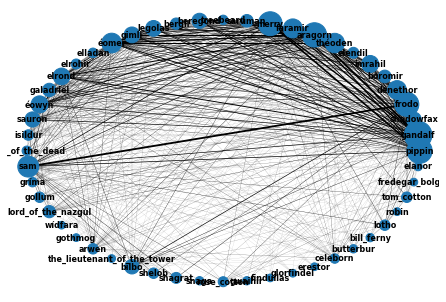

In [14]:
G = nx.Graph()
#nx.add_path(G,Characters)
NodesSize = list(OccurenceList.values()) # les occurences de chaque perso

G.add_nodes_from(OccurenceList.keys())


for (key1,key2) in CoocMatrix:
    G.add_edge(key1, key2, weight=CoocMatrix[key1,key2]/20)
weights = [G[u][v]['weight'] for u,v in G.edges()]

nx.draw(G, 
        pos = nx.circular_layout(G), 
        node_size = [50 + x*10 for x in NodesSize],
        width=weights,
        font_size = 8,
        font_weight = 'bold',
        with_labels = True) 
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()


#plt.show()

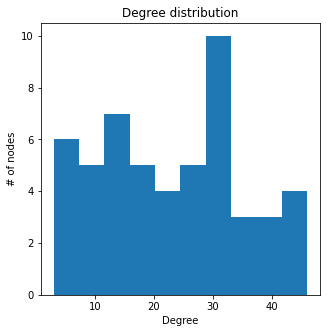

In [15]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.title("Degree distribution")
    plt.xlabel("Degree")
    plt.ylabel("# of nodes")
    plt.show()

plot_degree_dist(G)